<h1>Decision tree classifier</h1>

In [68]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

dados = dados.drop(columns=['Unnamed: 0'])

change_dict = {
    'yes': 1,
    'no': 0
}
dados['sold'] = dados['sold'].map(change_dict)

from datetime import datetime
dados['model_age'] = datetime.today().year - dados['model_year']
dados = dados.drop(columns=['model_year'])

x = dados[['mileage_per_year','price','model_age']]
y = dados['sold']

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_text_x, train_y, text_y = train_test_split(x, y, test_size=0.3, random_state=42)

<h2>MODELO</h2>

In [70]:
from sklearn.tree import DecisionTreeClassifier

#definindo um max depth do modelo -> profundidade da árvore
model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)

print("Precisão do modelo: {:.2f}%".format(model.score(raw_text_x, text_y) * 100))

Precisão do modelo: 77.33%


<h3>Visualização da árvore de decisões</h3>

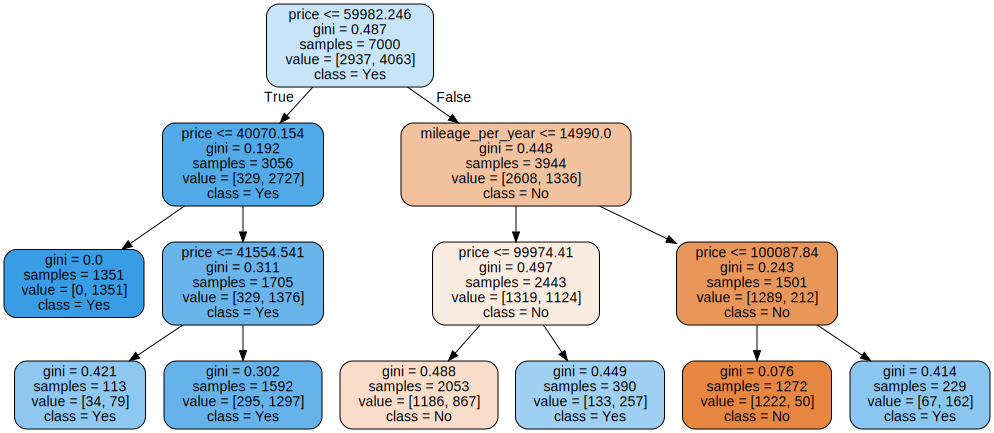

In [71]:
from sklearn.tree import export_graphviz
import graphviz

data = export_graphviz(
    model, 
    out_file=None,  # default value, no file written
    feature_names=x.columns,
    filled=True,
    rounded=True,
    class_names=['No', 'Yes'],
    )

graphviz.Source(data)


azul -> Vendeu <br>
vermelho -> Não Vendeu <br>
cores intermediárias -> Certa Incerteza <br>